In [1]:
import pandas
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = pandas.read_csv('gbm-data.csv')
y = data.pop('Activity').values
X = data.values
data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241)

1
      Iter       Train Loss   Remaining Time 
         1           1.0190           16.60s
         2           0.9192           16.50s
         3           0.8272           17.16s
         4           0.7834           17.83s
         5           0.7109           17.48s
         6           0.6368           17.36s
         7           0.5797           16.87s
         8           0.5610           16.35s
         9           0.5185           16.51s
        10           0.4984           16.29s
        20           0.1999           14.92s
        30           0.1313           13.77s
        40           0.0790           13.81s
        50           0.0511           13.06s
        60           0.0352           12.25s
        70           0.0245           11.52s
        80           0.0162           10.85s
        90           0.0114           10.18s
       100           0.0077            9.55s
       200           0.0004            2.85s
0.5
      Iter       Train Loss   Remaining Time 
  

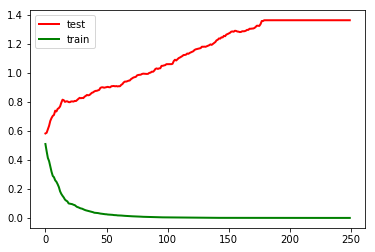

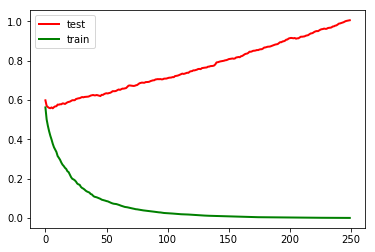

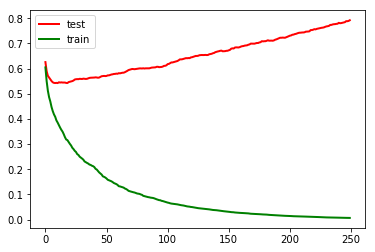

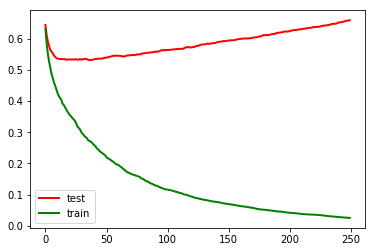

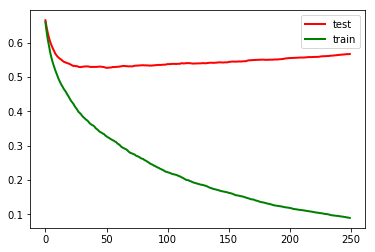

In [4]:
for alpha in [1, 0.5, 0.3, 0.2, 0.1]:
    print(alpha)
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = alpha)
    clf  = clf.fit(X_train, y_train)
    prediction_train = clf.staged_decision_function(X_train)
    prediction_test = clf.staged_decision_function(X_test)
    
    train_loss = []
    test_loss = []
    for x, y in zip(prediction_train, prediction_test):

        x = 1 / (1 + np.exp(-x))
        y = 1 / (1 + np.exp(-y))

        train_loss.append(log_loss(y_train, x))
        test_loss.append(log_loss(y_test, y))
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
     
    if alpha == 0.2:
        min_loss = min(test_loss)
        for i, x in enumerate(test_loss): 
            if x == min_loss:
                print(i)
        print(min_loss)

In [5]:
rf_clf = RandomForestClassifier(n_estimators=36,  random_state=241)
rf_clf = rf_clf.fit(X_train, y_train)
log_loss(y_test, rf_clf.predict_proba(X_test))

0.54138128618040693